# Variable Exploration

General exploration of points vs fields.

#### Load packages/prep data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.set_printoptions(threshold = 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [95]:
combined = pd.read_csv(r'..\Data_Pull\data_files\Simple_ML_files\combined_ml.csv', index_col='Unnamed: 0', parse_dates = ['Date'])

In [96]:
combined.head()

,Date,Team,Opp,BO,Pos,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,pid,Home/Away,Teams,BO_1,BO_7,BO_30,BO_lifetime,G_1,G_7,G_30,G_lifetime,AB_1,AB_7,AB_30,AB_lifetime,PA_1,PA_7,PA_30,PA_lifetime,H_1,H_7,H_30,H_lifetime,1B_1,1B_7,1B_30,1B_lifetime,2B_1,2B_7,2B_30,2B_lifetime,3B_1,3B_7,3B_30,3B_lifetime,HR_1,HR_7,HR_30,HR_lifetime,R_1,R_7,R_30,R_lifetime,RBI_1,RBI_7,RBI_30,RBI_lifetime,BB_1,BB_7,BB_30,BB_lifetime,IBB_1,IBB_7,IBB_30,IBB_lifetime,SO_1,SO_7,SO_30,SO_lifetime,HBP_1,HBP_7,HBP_30,HBP_lifetime,SF_1,SF_7,SF_30,SF_lifetime,SH_1,SH_7,SH_30,SH_lifetime,GDP_1,GDP_7,GDP_30,GDP_lifetime,SB_1,SB_7,SB_30,SB_lifetime,Date_pitch,Team_pitch,Opp_pitch,GS_pitch,W_pitch,L_pitch,SV_pitch,HLD_pitch,IP_pitch,TBF_pitch,H_pitch,R_pitch,ER_pitch,HR_pitch,BB_pitch,SO_pitch,K/9_pitch,BB/9_pitch,HR/9_pitch,BABIP_pitch,LOB%_pitch,GB%_pitch,HR/FB_pitch,ERA_pitch,FIP_pitch,xFIP_pitch,GSv2_pitch,pid_pitch,Home/Away_pitch,Teams_pitch,GS_1_pitch,GS_7_pitch,GS_30_pitch,GS_lifetime_pitch,W_1_pitch,W_7_pitch,W_30_pitch,W_lifetime_pitch,L_1_pitch,L_7_pitch,L_30_pitch,L_lifetime_pitch,SV_1_pitch,SV_7_pitch,SV_30_pitch,SV_lifetime_pitch,HLD_1_pitch,HLD_7_pitch,HLD_30_pitch,HLD_lifetime_pitch,IP_1_pitch,IP_7_pitch,IP_30_pitch,IP_lifetime_pitch,TBF_1_pitch,TBF_7_pitch,TBF_30_pitch,TBF_lifetime_pitch,H_1_pitch,H_7_pitch,H_30_pitch,H_lifetime_pitch,R_1_pitch,R_7_pitch,R_30_pitch,R_lifetime_pitch,ER_1_pitch,ER_7_pitch,ER_30_pitch,ER_lifetime_pitch,HR_1_pitch,HR_7_pitch,HR_30_pitch,HR_lifetime_pitch,BB_1_pitch,BB_7_pitch,BB_30_pitch,BB_lifetime_pitch,SO_1_pitch,SO_7_pitch,SO_30_pitch,SO_lifetime_pitch,QS_pitch,QS_1_pitch,QS_7_pitch,QS_30_pitch,QS_lifetime_pitch
0,2017-08-10,KCR,STL,9,P,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,18.0,Away,KCR_STL,0.0,0.00,0.00,0.00,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-10,STL,KCR,1.0,0.0,0.0,0.0,0.0,6.0,27.0,6.0,3.0,2.0,0.0,5.0,3.0,4.50,7.50,0.00,0.316,0.727,0.444,0.000,3.0,4.66,6.73,48.0,2520.0,Home,KCR_STL,1.0,7.0,23.0,23.0,1.0,4.0,10.0,10.0,0.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,42.2,130.8,130.8,23.0,164.0,541.0,541.0,3.0,30.0,99.0,99.0,1.0,9.0,52.0,52.0,1.0,7.0,46.0,46.0,1.0,3.0,22.0,22.0,3.0,13.0,49.0,49.0,4.0,28.0,114.0,114.0,1.0,1.0,6.0,13.0,13.0
1,2017-08-08,KCR,STL,0,P,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,18.0,Home,KCR_STL,9.0,4.50,4.50,4.50,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-08,STL,KCR,1.0,1.0,0.0,0.0,0.0,6.0,25.0,6.0,3.0,3.0,0.0,2.0,5.0,7.50,3.00,0.00,0.333,0.625,0.278,0.000,4.5,2.49,5.46,56.0,14078.0,Away,KCR_STL,1.0,7.0,20.0,20.0,0.0,5.0,8.0,8.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,42.2,109.5,109.5,19.0,166.0,461.0,461.0,5.0,32.0,108.0,108.0,1.0,9.0,50.0,50.0,1.0,9.0,45.0,45.0,1.0,3.0,11.0,11.0,3.0,9.0,36.0,36.0,5.0,47.0,110.0,110.0,1.0,0.0,4.0,11.0,11.0
2,2017-08-04,KCR,SEA,0,P,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,18.0,Home,KCR_SEA,0.0,2.25,2.25,2.25,1.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-04,SEA,KCR,1.0,1.0,0.0,0.0,0.0,6.0,23.0,4.0,2.0,2.0,0.0,1.0,7.0,10.50,1.50,0.00,0.267,0.600,0.667,0.000,3.0,1.32,1.62,68.0,11828.0,Away,KCR_SEA,1.0,7.0,18.0,18.0,1.0,6.0,11.0,11.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,46.1,105.7,105.7,25.0,175.0,435.0,435.0,6.0,29.0,87.0,87.0,0.0,9.0,34.0,34.0,0.

In [97]:
## Add in scoring
hit_scoring = {'1B' : 3, '2B' : 6, '3B' : 9, 'HR' : 12, 'RBI' : 3.5, 'R' : 3.2, 'BB' : 3, 'SB' : 6, 'HBP' : 3}
pitch_scoring = {'W_pitch' : 6, 'QS_pitch' : 4, 'ER_pitch' : -3, 'SO_pitch' : 3, 'IP_pitch' : 3}

combined_points = combined.loc[:, ['1B', '2B', '3B', 'HR', 'RBI', 'R', 'BB', 'SB', 'HBP']].assign(**hit_scoring).mul(
    combined.loc[:, ['1B', '2B', '3B', 'HR', 'RBI', 'R', 'BB', 'SB', 'HBP']]).sum(1)
combined.loc[:, 'Bat_Points'] = combined_points

combined_pitch_points = combined.loc[:, ['W_pitch', 'QS_pitch', 'ER_pitch', 'SO_pitch', 'IP_pitch']].assign(**pitch_scoring).mul(
    combined.loc[:, ['W_pitch', 'QS_pitch', 'ER_pitch', 'SO_pitch', 'IP_pitch']]).sum(1)
combined.loc[:, 'Pitch_Points'] = combined_pitch_points

#### Bat

In [4]:
combined.head()

,Date,Team_x,Opp_x,BO_x,Pos_x,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG_x,pid,Home/Away,Teams,BB%,K%,BB/K,OBP,SLG,OPS,ISO,Spd,BABIP,wSB,wRC,wRAA,wOBA,wRC+,BO_x_30,G_30,AB_30,PA_30,H_30,1B_30,2B_30,3B_30,HR_30,R_30,RBI_30,BB_30,IBB_30,SO_30,HBP_30,SF_30,SH_30,GDP_30,SB_30,CS_30,AVG_x_30,BB%_30,K%_30,BB/K_30,OBP_30,SLG_30,OPS_30,ISO_30,Spd_30,BABIP_30,wSB_30,wRC_30,wRAA_30,wOBA_30,wRC+_30,Age,Birthdate,Name,POS,Bats,Throws,Height,Weight,Date_pitch,Team_pitch,Opp_pitch,GS_pitch,W_pitch,L_pitch,SV_pitch,HLD_pitch,IP_pitch,TBF_pitch,H_pitch,R_pitch,ER_pitch,HR_pitch,BB_pitch,SO_pitch,K/9_pitch,BB/9_pitch,HR/9_pitch,BABIP_pitch,LOB%_pitch,GB%_pitch,HR/FB_pitch,ERA_pitch,FIP_pitch,xFIP_pitch,GSv2_pitch,pid_pitch,Home/Away_pitch,Teams_pitch,GS_30_pitch,W_30_pitch,L_30_pitch,SV_30_pitch,HLD_30_pitch,IP_30_pitch,TBF_30_pitch,H_30_pitch,R_30_pitch,ER_30_pitch,HR_30_pitch,BB_30_pitch,SO_30_pitch,QS_pitch,QS_30_pitch,Bat_Points,Pitch_Points
0,2018-07-31,TEX,ARI,9.0,P,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.0,Away,ARI_TEX,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0,-0.5,0.0,-100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16504,1973-05-24,Bartolo Colon,P,R,R,71,285,2018-07-31,ARI,TEX,1.0,1.0,0.0,0.0,0.0,7.0,25.0,2.0,0.0,0.0,0.0,1.0,10.0,12.86,1.29,0.00,0.154,1.000,0.538,0.000,0.00,1.16,1.63,84.0,14862.0,Home,ARI_TEX,30.0,14.0,11.0,0.0,0.0,163.6,745.0,170.0,95.0,86.0,19.0,80.0,180.0,1.0,12.0,0.0,61.0
1,2018-06-12,TEX,LAD,9.0,P,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.0,Away,LAD_TEX,0.0,0.500,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0,-0.5,0.0,-100.0,9.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,-0.5,0.0,-100.0,16455,1973-05-24,Bartolo Colon,P,R,R,71,285,2018-06-12,LAD,TEX,1.0,0.0,0.0,0.0,0.0,4.0,18.0,5.0,2.0,2.0,0.0,2.0,3.0,6.75,4.50,0.00,0.385,0.714,0.417,0.000,4.50,3.16,4.81,45.0,19349.0,Home,LAD_TEX,1.0,0.0,0.0,0.0,0.0,1.2,11.0,2.0,4.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,15.0
2,2017-08-09,MIN,MIL,9.0,P,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.0,Away,MIL_MIN,0.0,0.333,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0,-0.8,0.0,-100.0,9.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,-1.0,0.0,-200.0,16148,1973-05-24,Bartolo Colon,P,R,R,71,285,2017-08-09,MIL,MIN,1.0,0.0,1.0,0.0,0.0,5.2,24.0,3.0,2.0,2.0,1.0,3.0,2.0,3.18,4.76,1.59,0.118,0.893,0.500,0.111,3.18,6.86,7.39,52.0,16162.0,Home,MIL_MIN,1.0,1.0,0.0,0.0,0.0,6.1,27.0,7.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0,0.0,15.6
3,2017-07-24,MIN,LAD,9.0,P,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,375.0,Away,LAD_MIN,0.0,0.500,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0,-0.5,0.0,-100.0,9.0,3.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.833,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,-1.8,0.0,-300.0,16132,1973-05-24,Bartolo Colon,P,R,R,71,285,2017-07-24,LAD,MIN,1.0,0.0,0.0,0.0,0.0,5.0,21.0,5.0,2.0,2.0,0.0,3.0,5.0,9.00,5.40,0.00,0.385,0.750,0.333,0.000,3.60,2.96,4.02,53.0,14444.0,Home,LAD_MIN,13.0,3.0,6.0,0.0,0.0,66.8,301.0,78.0,39.0,34.0,15.0,21.0,67.0,0.0,2.0,0.0,24.0
4,2017-06-28,ATL,SDP,9.0,P,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,375.0,Away,ATL_SDP,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0,-0.3,0.0,-100.0,9.0,4.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.333,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,-2.3,0.0,-400.0,16106,1973-05-24,Bartolo Colon,P,R,R,71,285,2017-06-28,SDP,ATL,1.0,1.0,0.0,0.0,0.0,5.1,23.0,7.0,4.0,4.0,0.0,2.0,4.0,6.75,3.38,0.00,0.412,0.556,0.688,0.000,6.75,2.78,3.45,46.0,14682.0,Home,ATL_SDP,13.0,2.0,4.0,0.0,0.0,72.3,314.0,76.0,40.0,37.0,9.0,28.0,61.0,0.0,9.0,0.0,21.3


In [99]:
combined_train = combined.loc[:, combined.columns[(combined.columns.str.contains('30') | combined.columns.str.contains('1') | combined.columns.str.contains('7') |
                                                   combined.columns.str.contains('lifetime') | combined.columns.isin(['Bat_Points', 'Age', 'Home/Away']) | 
                                                   combined.columns.str.contains('Bat_Points')) & 
                                                  (~combined.columns.str.contains('Home/Away_pitch'))]]

In [100]:
combined_train.head()

,1B,Home/Away,BO_1,BO_7,BO_30,BO_lifetime,G_1,G_7,G_30,G_lifetime,AB_1,AB_7,AB_30,AB_lifetime,PA_1,PA_7,PA_30,PA_lifetime,H_1,H_7,H_30,H_lifetime,1B_1,1B_7,1B_30,1B_lifetime,2B_1,2B_7,2B_30,2B_lifetime,3B_1,3B_7,3B_30,3B_lifetime,HR_1,HR_7,HR_30,HR_lifetime,R_1,R_7,R_30,R_lifetime,RBI_1,RBI_7,RBI_30,RBI_lifetime,BB_1,BB_7,BB_30,BB_lifetime,IBB_1,IBB_7,IBB_30,IBB_lifetime,SO_1,SO_7,SO_30,SO_lifetime,HBP_1,HBP_7,HBP_30,HBP_lifetime,SF_1,SF_7,SF_30,SF_lifetime,SH_1,SH_7,SH_30,SH_lifetime,GDP_1,GDP_7,GDP_30,GDP_lifetime,SB_1,SB_7,SB_30,SB_lifetime,GS_1_pitch,GS_7_pitch,GS_30_pitch,GS_lifetime_pitch,W_1_pitch,W_7_pitch,W_30_pitch,W_lifetime_pitch,L_1_pitch,L_7_pitch,L_30_pitch,L_lifetime_pitch,SV_1_pitch,SV_7_pitch,SV_30_pitch,SV_lifetime_pitch,HLD_1_pitch,HLD_7_pitch,HLD_30_pitch,HLD_lifetime_pitch,IP_1_pitch,IP_7_pitch,IP_30_pitch,IP_lifetime_pitch,TBF_1_pitch,TBF_7_pitch,TBF_30_pitch,TBF_lifetime_pitch,H_1_pitch,H_7_pitch,H_30_pitch,H_lifetime_pitch,R_1_pitch,R_7_pitch,R_30_pitch,R_lifetime_pitch,ER_1_pitch,ER_7_pitch,ER_30_pitch,ER_lifetime_pitch,HR_1_pitch,HR_7_pitch,HR_30_pitch,HR_lifetime_pitch,BB_1_pitch,BB_7_pitch,BB_30_pitch,BB_lifetime_pitch,SO_1_pitch,SO_7_pitch,SO_30_pitch,SO_lifetime_pitch,QS_1_pitch,QS_7_pitch,QS_30_pitch,QS_lifetime_pitch,Bat_Points
0,0,Away,0.0,0.00,0.00,0.00,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,23.0,23.0,1.0,4.0,10.0,10.0,0.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,42.2,130.8,130.8,23.0,164.0,541.0,541.0,3.0,30.0,99.0,99.0,1.0,9.0,52.0,52.0,1.0,7.0,46.0,46.0,1.0,3.0,22.0,22.0,3.0,13.0,49.0,49.0,4.0,28.0,114.0,114.0,1.0,6.0,13.0,13.0,0.0
1,0,Home,9.0,4.50,4.50,4.50,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,20.0,20.0,0.0,5.0,8.0,8.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,42.2,109.5,109.5,19.0,166.0,461.0,461.0,5.0,32.0,108.0,108.0,1.0,9.0,50.0,50.0,1.0,9.0,45.0,45.0,1.0,3.0,11.0,11.0,3.0,9.0,36.0,36.0,5.0,47.0,110.0,110.0,0.0,4.0,11.0,11.0,0.0
2,0,Home,0.0,2.25,2.25,2.25,1.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,18.0,18.0,1.0,6.0,11.0,11.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,46.1,105.7,105.7,25.0,175.0,435.0,435.0,6.0,29.0,87.0,87.0,0.0,9.0,34.0,34.0,0.0,9.0,32.0,32.0,0.0,1.0,5.0,5.0,0.0,9.0,31.0,31.0,8.0,55.0,125.0,125.0,1.0,7.0,11.0,11.0,0.0
3,0,Away,0.0,1.80,1.80,1.80,1.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,20.0,20.0,0.0,3.0,9.0,9.0,0.0,3.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,36.2,118.4,118.4,27.0,167.0,495.0,495.0,8.0,41.0,112.0,112.0,7.0,33.0,61.0,61.0,7.0,32.0,60.0,60.0,2.0,10.0,21.0,21.0,3.0,16.0,39.0,39.0,4.0,33.0,92.0,92.0,0.0,2.0,13.0,13.0,0.0
4,0,Away,0.0,1.50,1.50,1.50,1.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,12.0,12.0,0.0,3.0,4.0,4.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,41.4

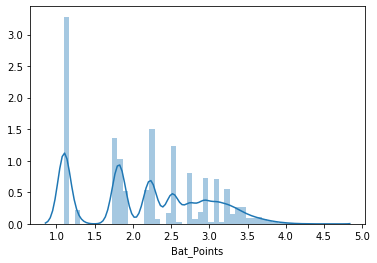

In [10]:
sns.distplot((combined_train.loc[combined_train['Bat_Points'] != 0]['Bat_Points']), bins = 50)

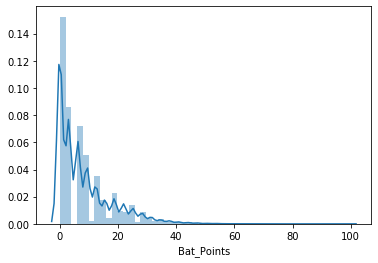

In [11]:
sns.distplot((combined_train.loc[:, 'Bat_Points']), bins = 50)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


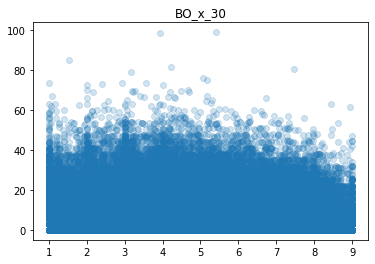

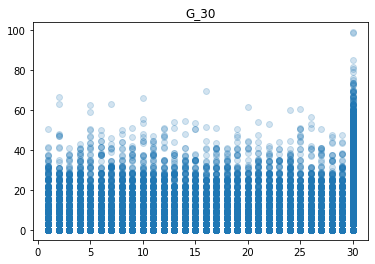

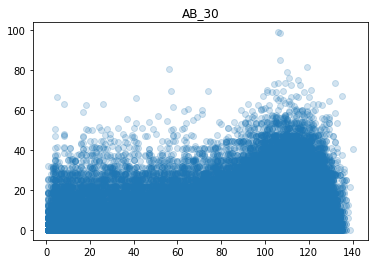

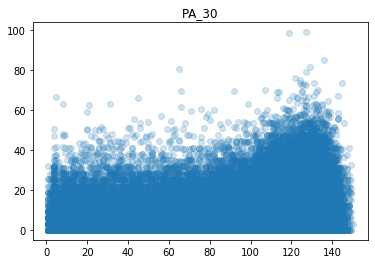

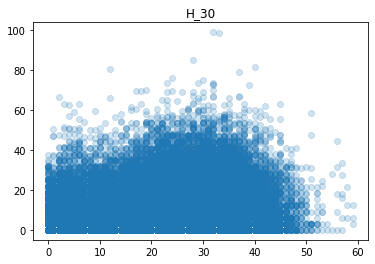

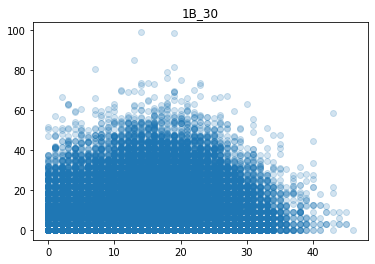

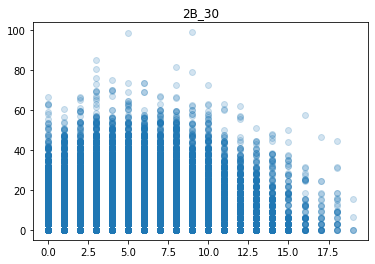

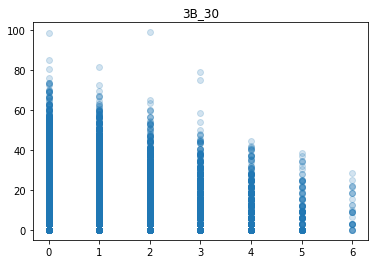

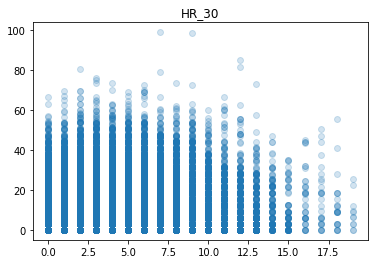

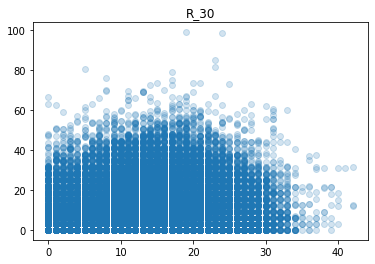

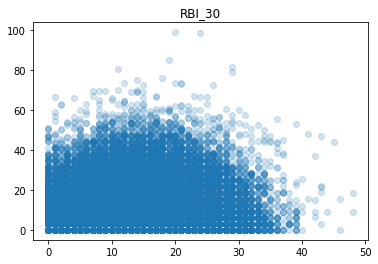

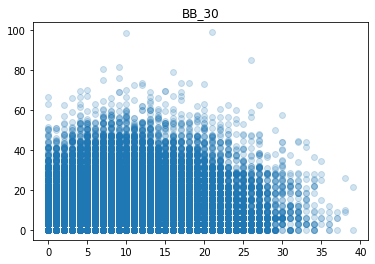

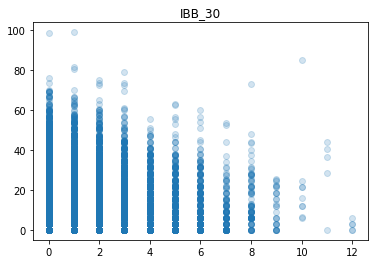

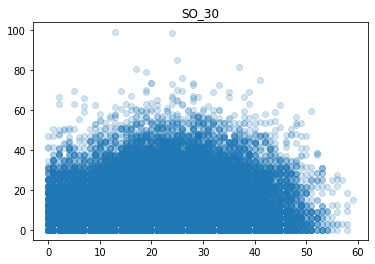

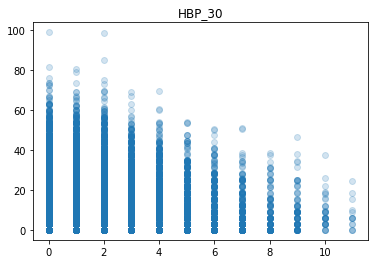

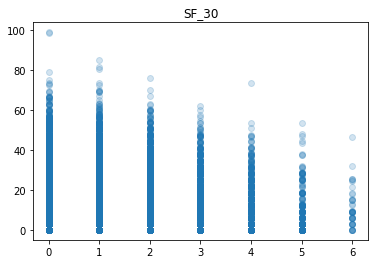

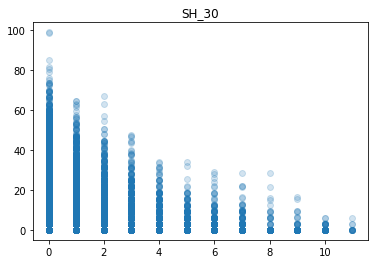

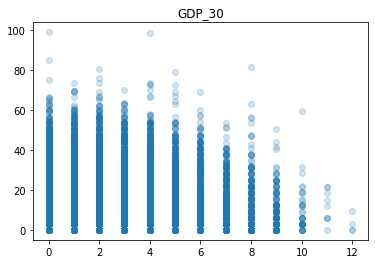

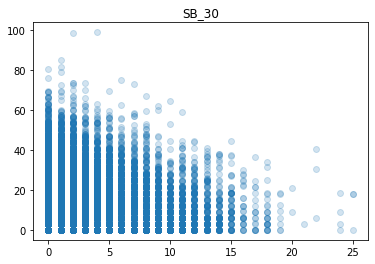

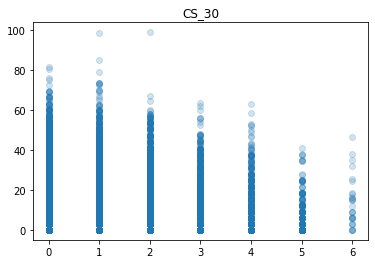

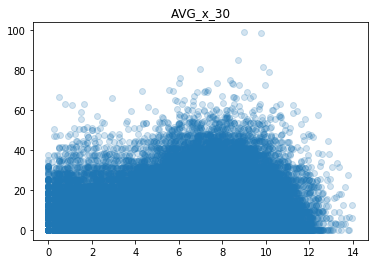

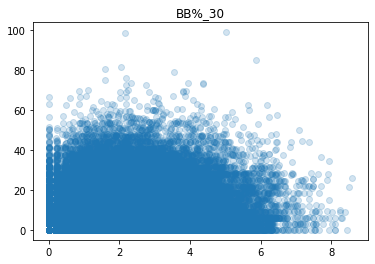

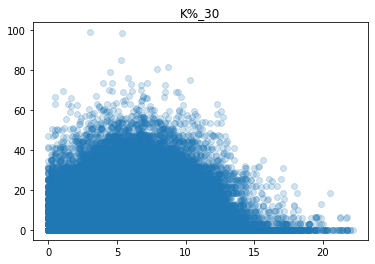

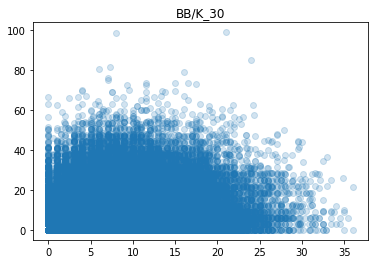

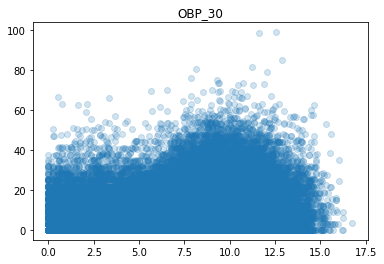

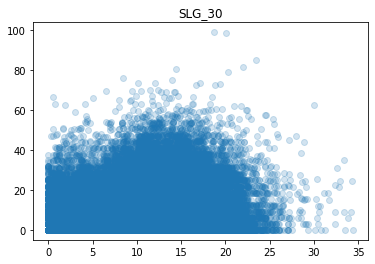

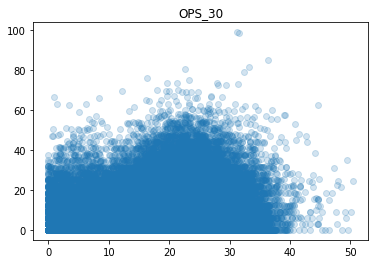

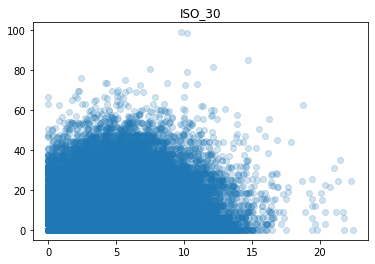

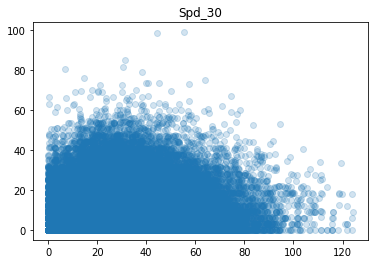

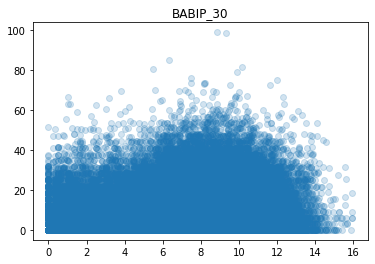

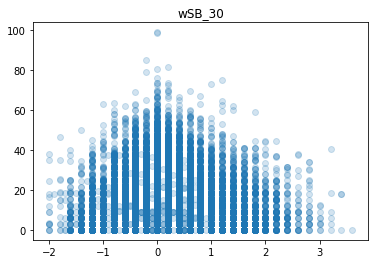

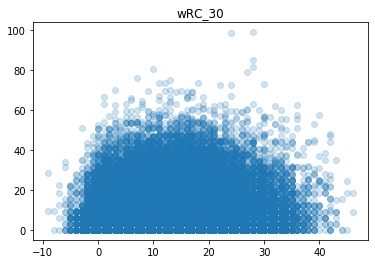

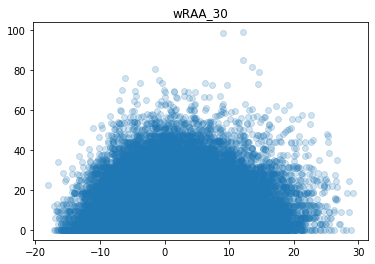

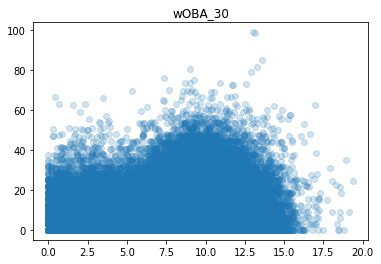

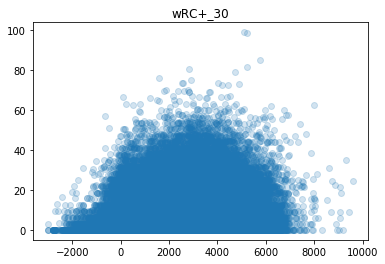

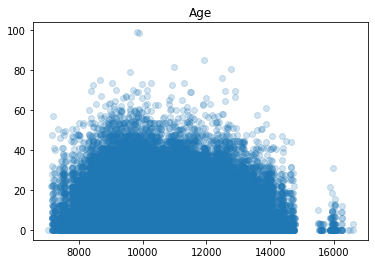

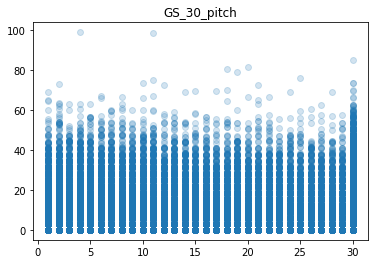

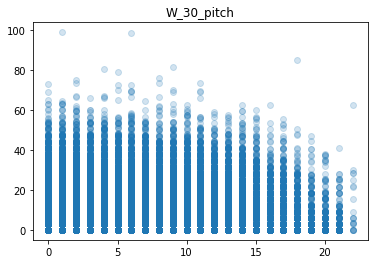

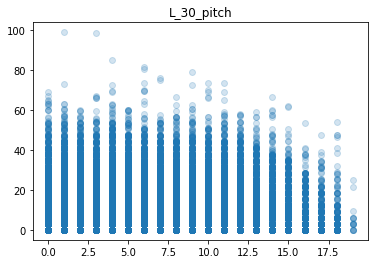

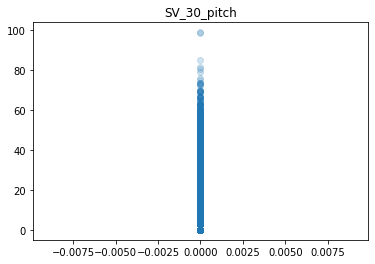

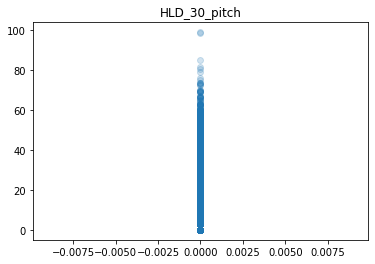

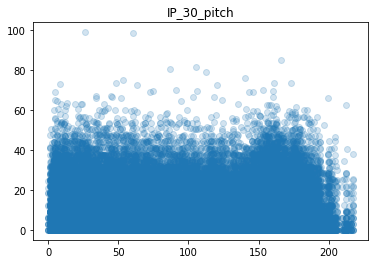

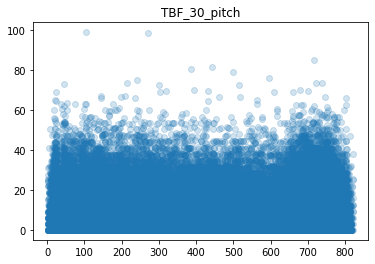

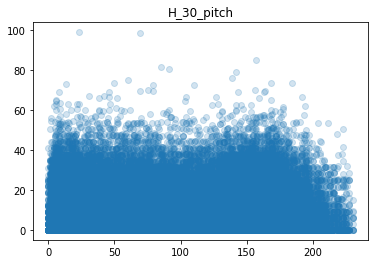

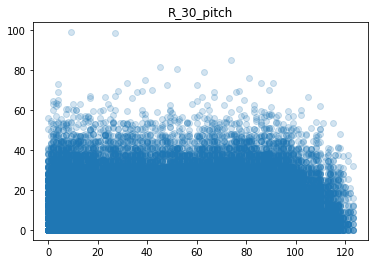

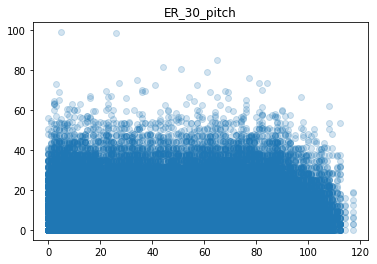

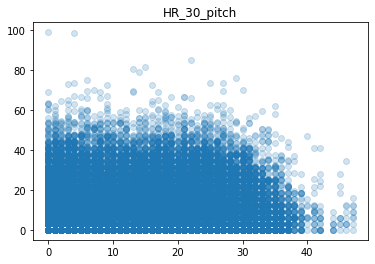

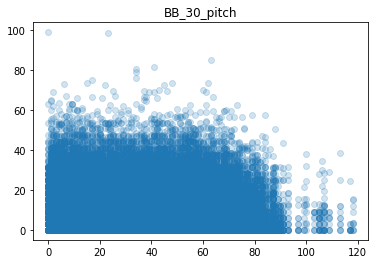

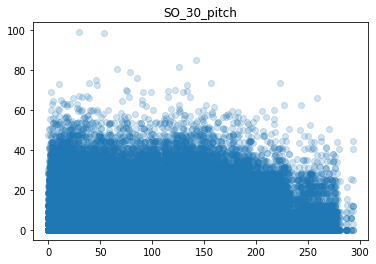

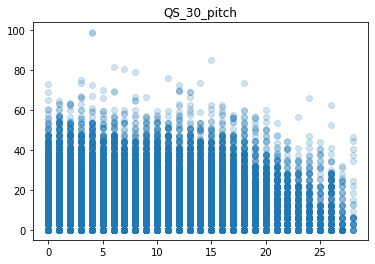

<Figure size 432x288 with 0 Axes>

In [12]:
for col in combined_train.columns[1:]:
    
    fig, ax = plt.subplots()
    
    ax.scatter(combined_train[col], combined_train['Bat_Points'], alpha = .2)
    
    ax.set_title(col)
    
plt.clf()

## PCA

In [101]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [102]:
combined_train.dropna(inplace = True)

In [103]:
X = combined_train.drop(columns = 'Bat_Points')
y = combined_train.loc[:, 'Bat_Points']

In [115]:
X = pd.get_dummies(X, drop_first = True)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
pca_X = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [118]:
rand_forest = RandomForestRegressor()

In [119]:
rand_forest.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [120]:
rand_forest.score(X_test, y_test)

0.20035832649066054

In [121]:
preds = rand_forest.predict(X_test)

In [122]:
error = np.sqrt(np.mean((preds - y_test)**2))

In [123]:
error

7.955485485043257